### Exercise 8

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as smf
from statsmodels .stats. outliers_influence import variance_inflation_factor as VIF

In [2]:
!pip3 install ISLP
from ISLP import load_data

from ISLP import load_data
from ISLP.models import ( ModelSpec as MS ,
summarize ,
poly)

In [3]:
Auto = load_data("Auto")
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [4]:
X = pd.DataFrame({'intercept': np.ones(Auto.shape[0]),
                  'horsepower': Auto.horsepower}
                )
y = Auto.mpg

In [5]:
linear_model = sm.OLS(y, X)
results = linear_model.fit()

print(results.t_test([1,0]))
print(results.t_test([0,1]))


                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            39.9359      0.717     55.660      0.000      38.525      41.347
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.1578      0.006    -24.489      0.000      -0.171      -0.145


In [6]:
x0 = [1, 98]
prediction = results.get_prediction(x0)
print(f'Predicted mean = {prediction.predicted_mean[0]:.2f}')
print(f'Confidence interval = {prediction.conf_int(alpha=0.05)}')
print(f'Prediction interval = {prediction.conf_int(obs=True, alpha=0.05)}')


Predicted mean = 24.47
Confidence interval = [[23.97307896 24.96107534]]
Prediction interval = [[14.80939607 34.12475823]]


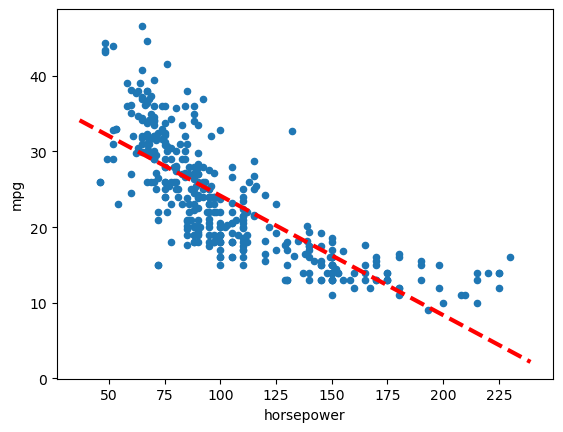

In [7]:
def abline(ax, b, m, *args, **kwargs):
    x_lim = ax.get_xlim()
    y_lim = [m * x_lim[0] + b, m * x_lim[1] + b]
    ax.plot(x_lim, y_lim, *args, **kwargs)
ax = Auto.plot.scatter('horsepower','mpg')
b, m = results.params
abline(ax, b, m, 'r--', linewidth =3)

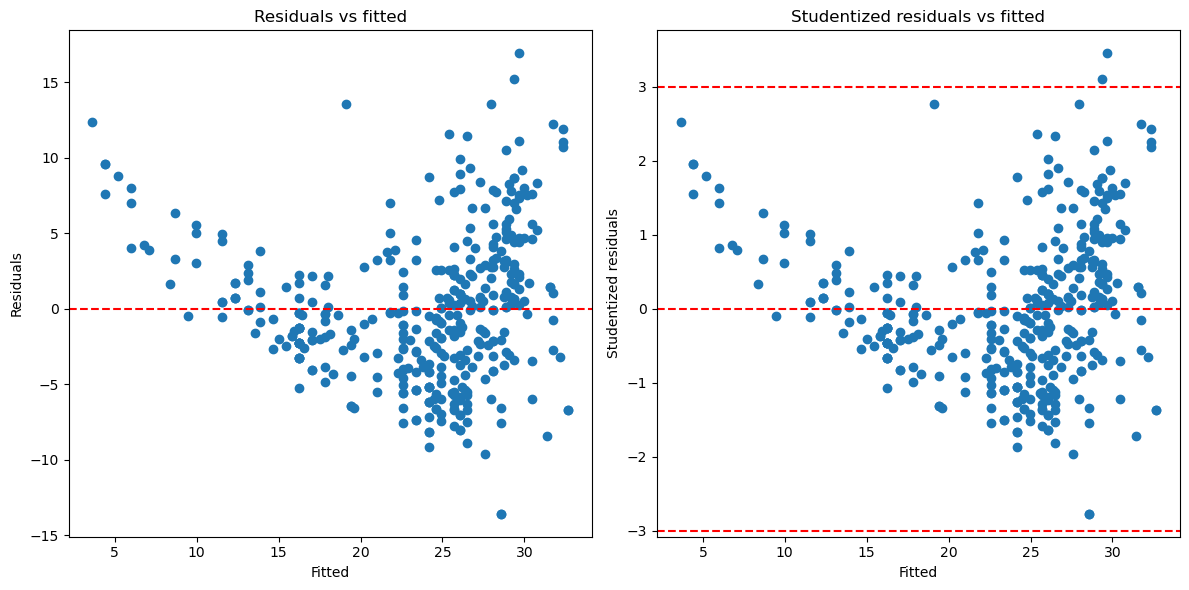

In [8]:
preds = results.fittedvalues
errors = y - preds
std_errors = (errors - errors.mean() ) / errors.std()
_, axs = plt.subplots(1,2, figsize=(12,6))

axs[0].scatter(preds, errors)
axs[0].axhline(errors.mean(), color ='r', linestyle='--')
axs[0].set_title('Residuals vs fitted')
axs[0].set_xlabel('Fitted')
axs[0].set_ylabel('Residuals')

axs[1].scatter(preds, std_errors)
axs[1].axhline(errors.mean(), color ='r', linestyle='--')
axs[1].axhline(errors.mean() + 3 , color ='r', linestyle='--')
axs[1].axhline(errors.mean() - 3 , color ='r', linestyle='--')
axs[1].set_title('Studentized residuals vs fitted')
axs[1].set_xlabel('Fitted')
axs[1].set_ylabel('Studentized residuals')




plt.tight_layout()


115

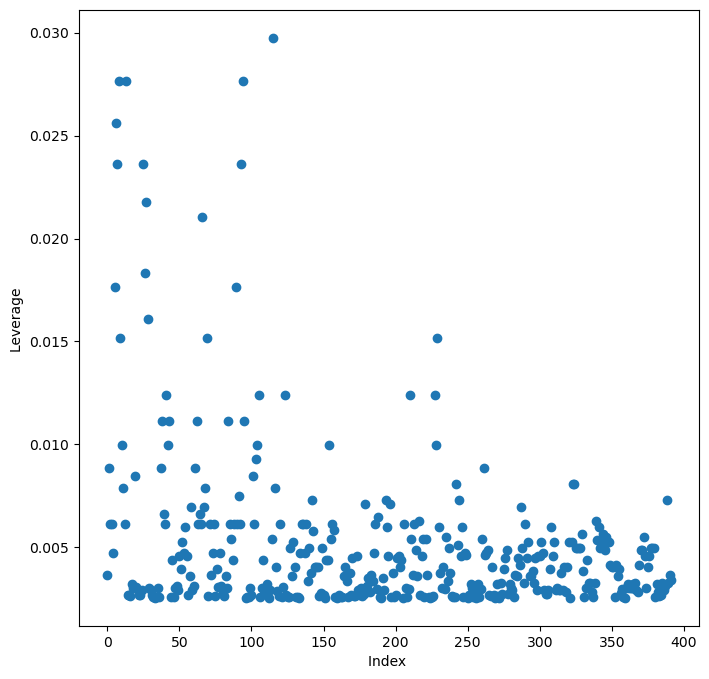

In [9]:
infl = results.get_influence()
ax = plt.subplots(figsize =(8 ,8))[1]
ax.scatter(np.arange(X.shape [0]) , infl.hat_matrix_diag)
ax.set_xlabel ('Index ')
ax.set_ylabel ('Leverage ')
np.argmax(infl. hat_matrix_diag )

### Exercise 9

In [10]:
Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


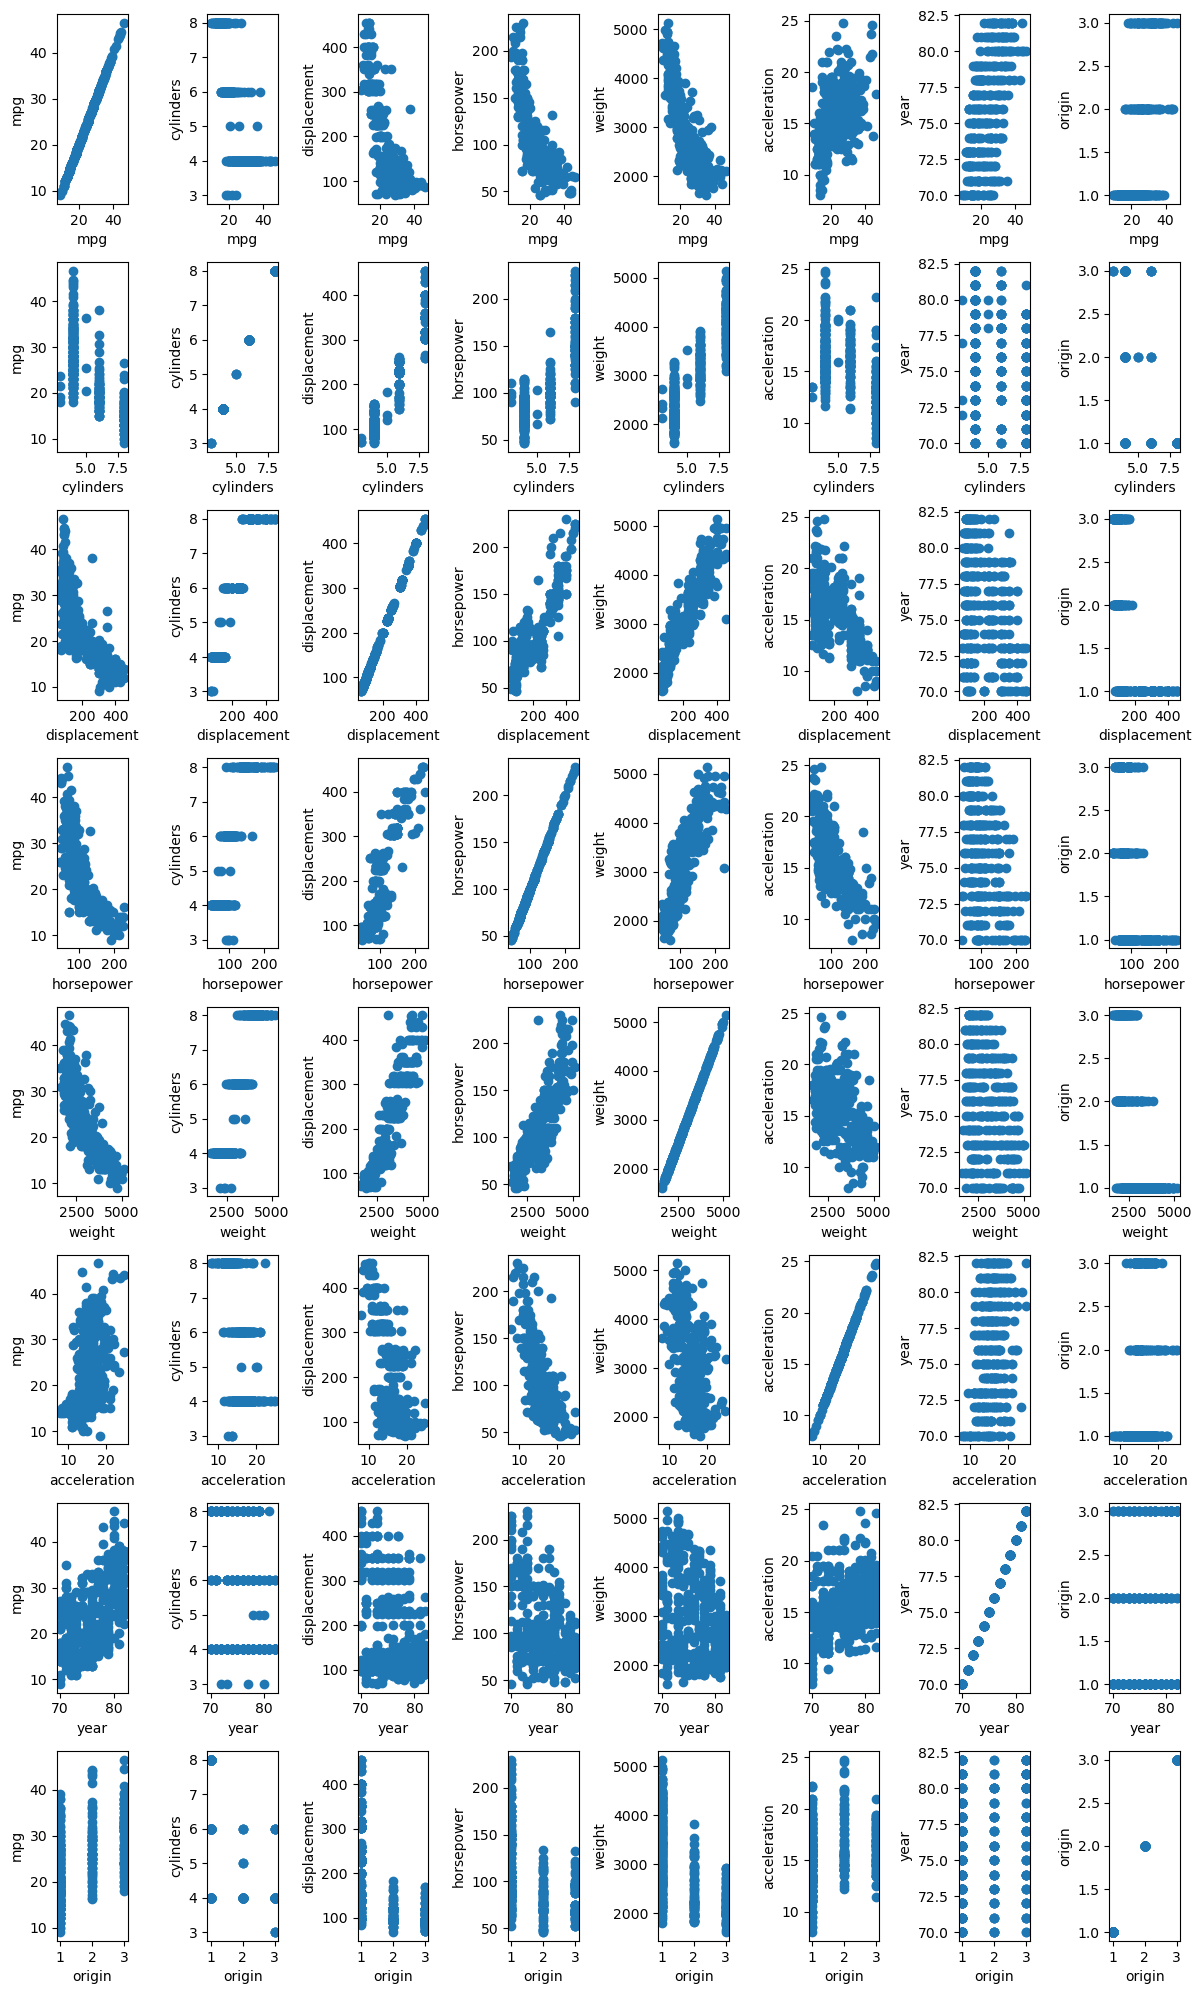

In [11]:
columns = Auto.columns
p = len(columns)
_, axs = plt.subplots(p, p, figsize=(12,20))
for i in range(p):
    for j in range(p):
        col1, col2 = columns[i], columns[j]
        var1, var2 = Auto[col1], Auto[col2]
        ax = axs[i][j]
        ax.scatter(var1, var2)
        ax.set_xlabel(col1)
        ax.set_ylabel(col2)
plt.tight_layout()
plt.show()

In [12]:
correlations = Auto.corr()
correlations

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [13]:
features = Auto.columns.drop('mpg')
X = MS(Auto[features]).fit_transform(Auto)
y = Auto.mpg

linear_model = smf.ols(formula="mpg ~ " + " + ".join(Auto.columns.difference(['mpg'])), data=Auto)
results = linear_model.fit()
summarize(results)


,coef,std err,t,P>|t|
Intercept,-17.2184,4.644,-3.707,0.000
acceleration,0.0806,0.099,0.815,0.415
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
origin,1.4261,0.278,5.127,0.000
weight,-0.0065,0.001,-9.929,0.000
year,0.7508,0.051,14.729,0.000


In [14]:
reduced_results = sm.OLS(y, np.ones(len(y))).fit()
anova_lm(reduced_results, results)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,391.0,23818.993469,0.0,NaN,NaN,NaN
1,384.0,4252.212530,7.0,19566.780939,252.428045,2.037106e-139


Text(0.5, 1.0, 'Stud Residuals vs fitted')

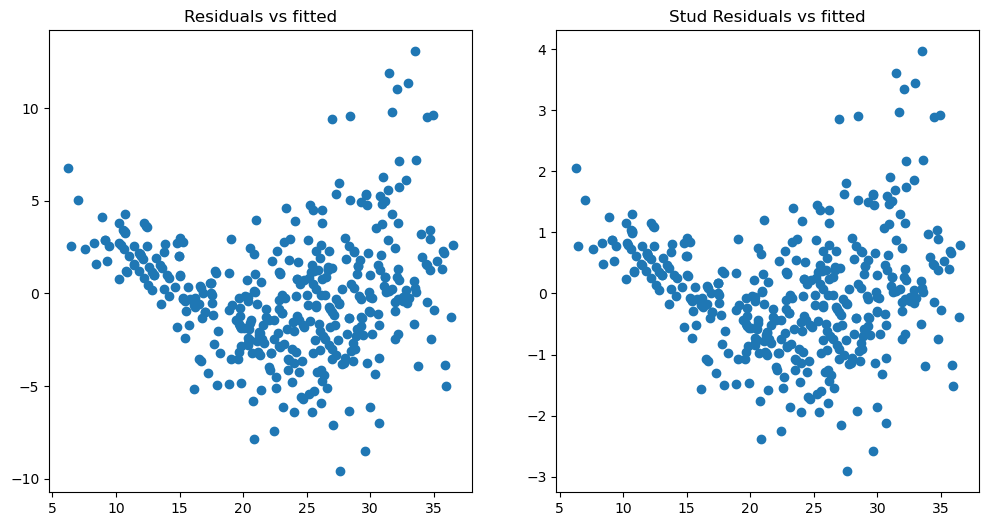

In [15]:
residuals = results.resid.values
residuals_stud = (residuals - residuals.mean()) / residuals.std()
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].scatter(results.fittedvalues, residuals)
ax[0].set_title('Residuals vs fitted')
ax[1].scatter(results.fittedvalues, residuals_stud)
ax[1].set_title('Stud Residuals vs fitted')

13

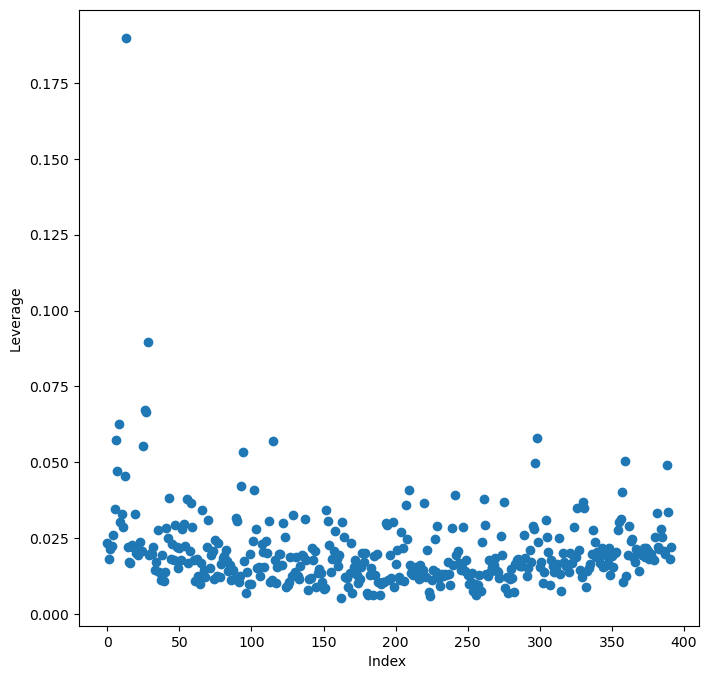

In [16]:
infl = results.get_influence()
ax = plt.subplots(figsize =(8 ,8))[1]
ax.scatter(np.arange(X.shape [0]) , infl.hat_matrix_diag)
ax.set_xlabel ('Index ')
ax.set_ylabel ('Leverage ')
np.argmax(infl. hat_matrix_diag )

In [17]:
vals = [VIF(X, i) for i in range (1, X.shape [1])]
vif = pd. DataFrame ({'vif ':vals}, index=X.columns [1:])
vif

,vif
cylinders,10.737535
displacement,21.836792
horsepower,9.943693
weight,10.831260
acceleration,2.625806
year,1.244952
origin,1.772386


Seems like displacement might be correlated with other variables

## Interaction terms

In [18]:
X = X[features]
X = sm.add_constant(X)
for col1 in X.columns[1:]:
    for col2 in X.columns[1:]:
        if col1 == col2:
            continue
        interaction = X[col1] * X[col2]
        X_interact = pd.concat([X, interaction], axis = 1)
        results_corr = sm.OLS(y, X_interact).fit()
        print(f'{col1}-{col2}: \n {anova_lm(results, results_corr)}')

cylinders-displacement: 
    df_resid          ssr  df_diff     ss_diff          F        Pr(>F)
0     384.0  4252.212530      0.0         NaN        NaN           NaN
1     383.0  3655.432668      1.0  596.779862  62.527943  2.836709e-14
cylinders-horsepower: 
    df_resid         ssr  df_diff     ss_diff           F        Pr(>F)
0     384.0  4252.21253      0.0         NaN         NaN           NaN
1     383.0  3284.96700      1.0  967.245531  112.772834  2.909170e-23
cylinders-weight: 
    df_resid          ssr  df_diff     ss_diff          F        Pr(>F)
0     384.0  4252.212530      0.0         NaN        NaN           NaN
1     383.0  3497.914054      1.0  754.298477  82.591028  5.497863e-18
cylinders-acceleration: 
    df_resid          ssr  df_diff     ss_diff          F    Pr(>F)
0     384.0  4252.212530      0.0         NaN        NaN       NaN
1     383.0  4010.715467      1.0  241.497063  23.061565  0.000002
cylinders-year: 
    df_resid          ssr  df_diff     ss_diff 

In [19]:
#Include cylinders-origin interaction
X_int = pd.concat([X, X['cylinders'] * X['origin']], axis = 1)
results_int = sm.OLS(y, X).fit()

Text(0.5, 1.0, 'Stud Residuals vs fitted')

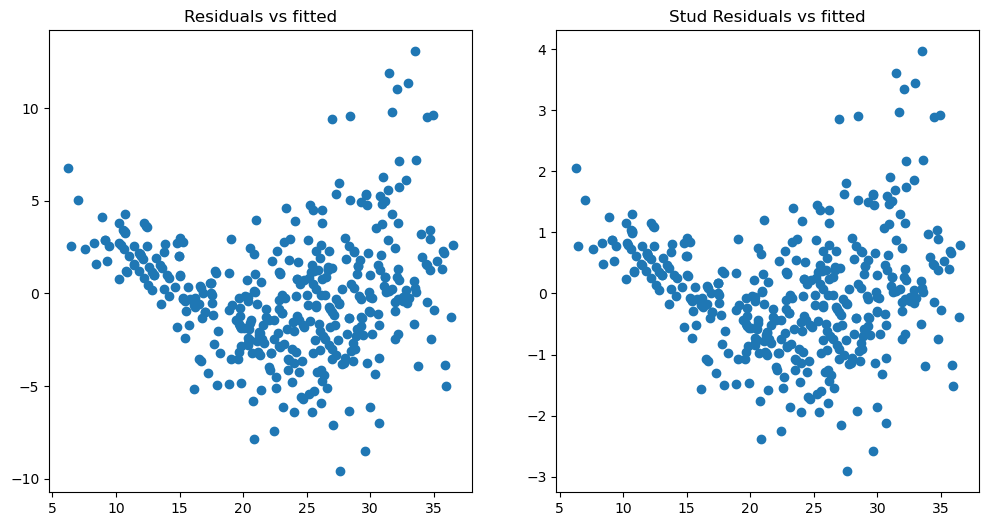

In [20]:
residuals_int = results_int.resid.values
residuals_int_stud = (residuals_int - residuals_int.mean()) / residuals_int.std()
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].scatter(results_int.fittedvalues, residuals_int)
ax[0].set_title('Residuals vs fitted')
ax[1].scatter(results_int.fittedvalues, residuals_int_stud)
ax[1].set_title('Stud Residuals vs fitted')

# Exercise 10

# a)

In [21]:
import statsmodels.api as sm

In [22]:
#Load data
Carseats = load_data("Carseats")
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [23]:
# Prepare data
features = ['Price', 'Urban', 'US']
X = sm.add_constant(Carseats[features])
X[['Urban','US']] = X[['Urban','US']].replace({'Yes':1, 'No':0})

y = Carseats.Sales

/var/folders/4z/2g96pmwd6xl1ctlh7l8scd8c0000gn/T/ipykernel_30947/548560295.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[['Urban','US']] = X[['Urban','US']].replace({'Yes':1, 'No':0})
/var/folders/4z/2g96pmwd6xl1ctlh7l8scd8c0000gn/T/ipykernel_30947/548560295.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  X[['Urban','US']] = X[['Urban','US']].replace({'Yes':1, 'No':0})
/var/folders/4z/2g96pmwd6xl1ctlh7l8scd8c0000gn/T/ipykernel_30947/548560295.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a 

In [24]:
# Fit linear model
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           2.39e-23
Time:                        17:40:44   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## d), e)

In [25]:
# Fit model without Urban predictor
X_new = X.drop('Urban', axis=1)

model_new = sm.OLS(y,X_new)
results_new = model_new.fit()
results_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           2.66e-24
Time:                        17:40:44   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US             1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## g)

In [26]:
params = results_new.params
confidence_intervals = results_new.conf_int()

for i in range(len(params)):
    parameter = X_new.columns[i]
    print(f'{parameter}: {params.iloc[i]:.2f}')
    print(f'Confidence interval: {confidence_intervals.loc[parameter,:].values}')

const: 13.03
Confidence interval: [11.7903202  14.27126531]
Price: -0.05
Confidence interval: [-0.06475984 -0.04419543]
US: 1.20
Confidence interval: [0.69151957 1.70776632]


## e)

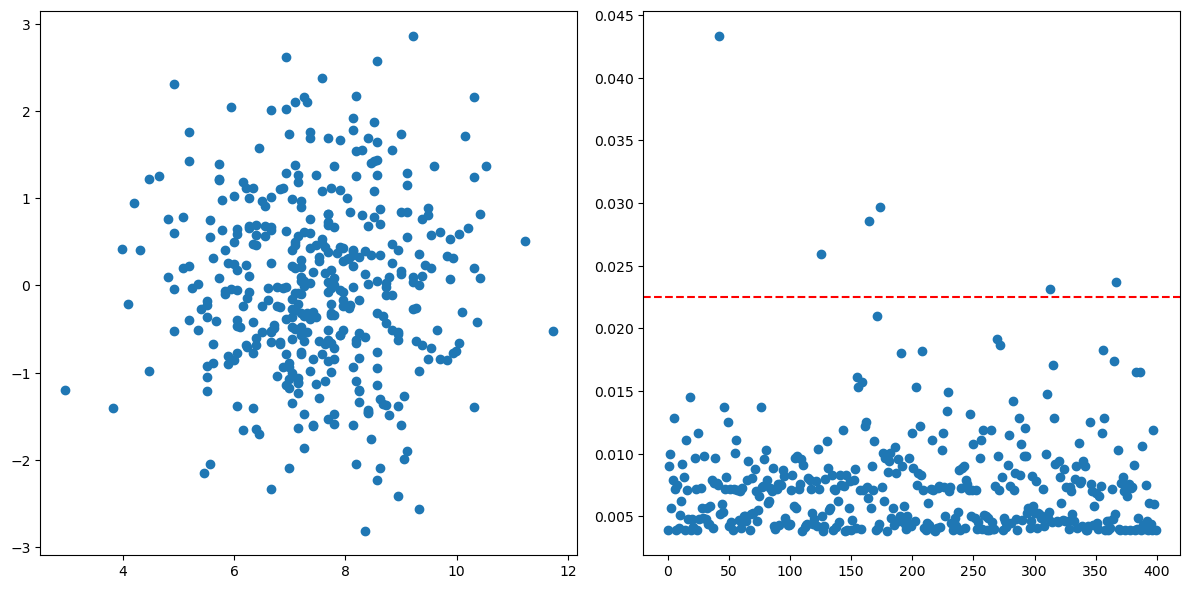

In [27]:
# Outliers and leverage
fitted_values = results_new.fittedvalues
errors = results_new.resid
errors_stud = (errors - errors.mean()) / errors.std()
leverage = results_new.get_influence().hat_matrix_diag


_, [ax0, ax1] = plt.subplots(1,2,figsize=(12,6))

ax0.scatter(fitted_values, errors_stud)
ax1.scatter(np.arange(len(leverage)), leverage)
ax1.axhline(3 * len(params)/len(leverage), color='r', linestyle='--')

plt.tight_layout()
plt.show()



# Exercise 11

In [48]:
rng = np.random.default_rng(1)
x = rng.normal(size =100)
y = 2 * x + rng.normal(size =100)

## a)

In [49]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Mon, 04 Nov 2024   Prob (F-statistic):                    6.23e-31
Time:                        17:58:56   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9762      0.117     16.898      0.000       1.744       2.208
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.847
Skew:                           0.121   Prob(JB):                        0.655
Kurtosis:                       3.381   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## b)

In [50]:
model2 = sm.OLS(x,y)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Mon, 04 Nov 2024   Prob (F-statistic):                    6.23e-31
Time:                        17:58:57   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3757      0.022     16.898      0.000       0.332       0.420
==============================================================================
Omnibus:                       13.156   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.596
Skew:                          -0.528   Prob(JB):                     1.24e-05
Kurtosis:                       5.075   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Exercise 13

## a,b,c)

In [85]:
rng = np.random.default_rng(1)
X = rng.normal(size=100)
eps = rng.normal(scale=0.25, size=100)
y = -1 + 0.5 * X + eps

## d)

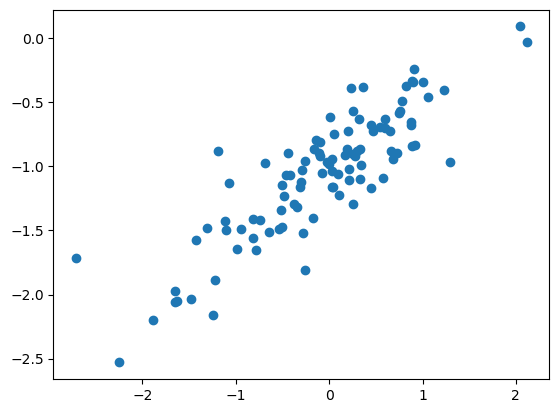

In [86]:
plt.scatter(X,y)

## e)

In [87]:
X_const = sm.add_constant(X)
model = sm.OLS(y,X_const)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           1.74e-30
Time:                        18:42:53   Log-Likelihood:                -2.4306
No. Observations:                 100   AIC:                             8.861
Df Residuals:                      98   BIC:                             14.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0190      0.025    -40.537      0.000      -1.069      -0.969
x1             0.4921      0.029     16.734      0.000       0.434       0.551
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## f)

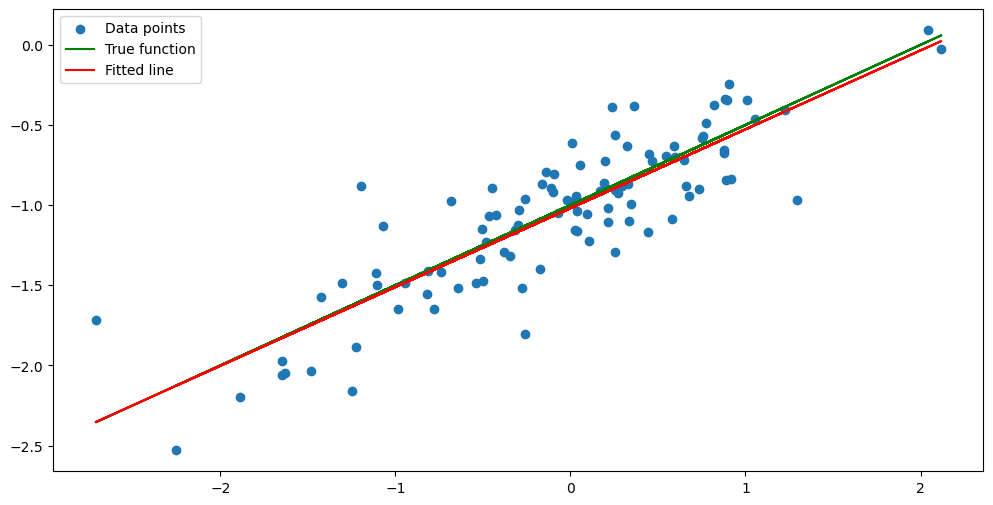

In [88]:
b, m = results.params
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(x,y, label='Data points')
ax.plot(X, -1 + 0.5 * X, color='g', label='True function')
ax.plot(X, results.fittedvalues, color='r', label='Fitted line')
ax.legend()
plt.show()

## g)

In [89]:
X_quadratic = pd.concat([pd.DataFrame(X_const), pd.Series(X ** 2)], axis=1)
X_quadratic.columns = ['const', 'X', 'X^2']
X_quadratic

model_q = sm.OLS(y, X_quadratic)
results_q = model_q.fit()
results_q.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     138.6
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           3.66e-29
Time:                        18:43:04   Log-Likelihood:                -2.4293
No. Observations:                 100   AIC:                             10.86
Df Residuals:                      97   BIC:                             18.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0182      0.030    -34.186      0.000      -1.077      -0.959
X              0.4916      0.032     15.562      0.000       0.429       0.554
X^2           -0.0012      0.023     -0.052      0.959      -0.046       0.044
==============================================================================
Omnibus:                        1.338   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                0.814
Skew:                           0.119   Prob(JB):                        0.666
Kurtosis:                       3.372   Cond. No.                         2.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
anova_lm(results, results_q)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,98.0,6.146642,0.0,NaN,NaN,NaN
1,97.0,6.146471,1.0,0.00017,0.002688,0.958757


## h), i)

In [98]:
sigma = 0.5
X = rng.normal(size=100)
eps = rng.normal(scale=sigma, size=100)
y = -1 + 0.5 * X + eps

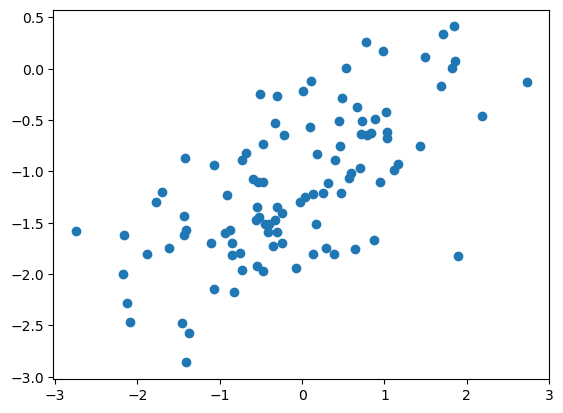

In [99]:
plt.scatter(X,y)

In [100]:
X_const = sm.add_constant(X)
model = sm.OLS(y,X_const)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     76.14
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           7.00e-14
Time:                        18:46:11   Log-Likelihood:                -77.954
No. Observations:                 100   AIC:                             159.9
Df Residuals:                      98   BIC:                             165.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1021      0.053    -20.604      0.000      -1.208      -0.996
x1             0.4289      0.049      8.726      0.000       0.331       0.526
==============================================================================
Omnibus:                        0.359   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.836   Jarque-Bera (JB):                0.505
Skew:                          -0.118   Prob(JB):                        0.777
Kurtosis:                       2.744   Cond. No.                         1.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

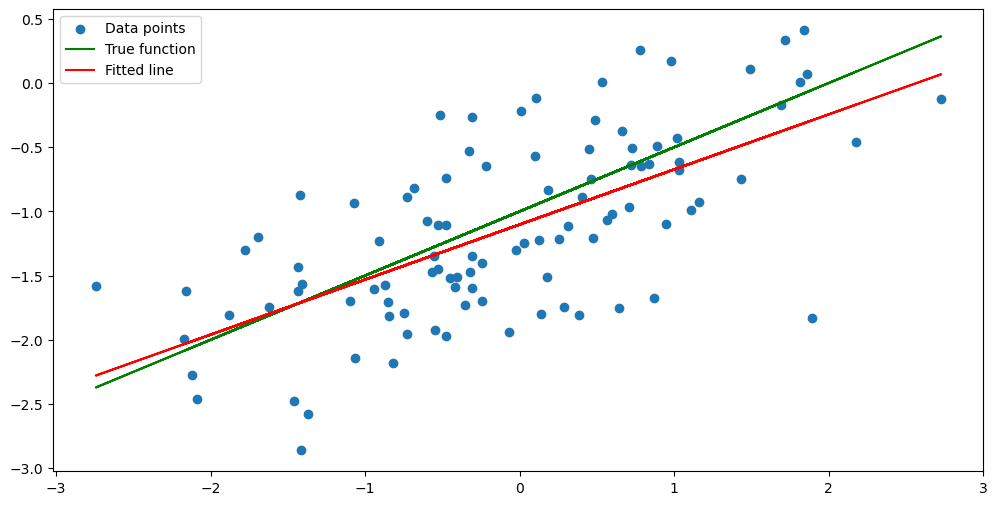

In [101]:
b, m = results.params
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(X,y, label='Data points')
ax.plot(X, -1 + 0.5 * X, color='g', label='True function')
ax.plot(X, results.fittedvalues, color='r', label='Fitted line')
ax.legend()
plt.show()

# Exercise 14

In [102]:
# a)
rng = np.random. default_rng (10)
x1 = rng.uniform (0, 1, size =100)
x2 = 0.5 * x1 + rng.normal(size =100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size =100)

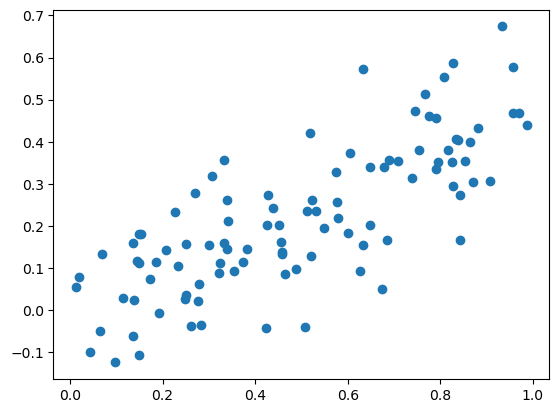

In [105]:
# b)
plt.scatter(x1, x2)
plt.show()

In [109]:
# c)
X = pd.DataFrame({
    'const': np.ones(len(x1)), 
    'x1' : x1, 
    'x2' : x2
})
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           5.76e-08
Time:                        18:53:10   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.000       1.581       2.334
x1             1.6154      0.527      3.065      0.003       0.569       2.661
x2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
#d)
X_short = X.drop('x2', axis=1)
model_2 = sm.OLS(y,X_short)
results_2 = model_2.fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           1.37e-08
Time:                        18:55:17   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.000       1.562       2.312
x1             2.0771      0.335      6.196      0.000       1.412       2.742
==============================================================================
Omnibus:                        0.204   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.042
Skew:                          -0.046   Prob(JB):                        0.979
Kurtosis:                       3.038   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
#e)
X_short_2 = X.drop('x1', axis=1)
model_3 = sm.OLS(y,X_short_2)
results_3 = model_3.fit()
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           7.43e-07
Time:                        18:57:08   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.000       2.019       2.629
x2             2.9103      0.550      5.291      0.000       1.819       4.002
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.373
Skew:                          -0.034   Prob(JB):                        0.830
Kurtosis:                       2.709   Cond. No.                         6.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
# g)
x1 = np.concatenate ([x1 , [0.1]])
x2 = np.concatenate ([x2 , [0.8]])
y = np.concatenate ([y, [6]])

In [116]:
X = pd.DataFrame({
    'const': np.ones(len(x1)), 
    'x1' : x1, 
    'x2' : x2
})
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     22.92
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           6.60e-09
Time:                        18:58:26   Log-Likelihood:                -137.93
No. Observations:                 102   AIC:                             281.9
Df Residuals:                      99   BIC:                             289.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1121      0.193     10.952      0.000       1.729       2.495
x1             0.4907      0.429      1.145      0.255      -0.360       1.341
x2             2.9070      0.624      4.659      0.000       1.669       4.145
==============================================================================
Omnibus:                        0.912   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.634   Jarque-Bera (JB):                0.903
Skew:                          -0.034   Prob(JB):                        0.637
Kurtosis:                       2.544   Cond. No.                         8.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
X_short = X.drop('x2', axis=1)
model_2 = sm.OLS(y,X_short)
results_2 = model_2.fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     19.99
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           2.05e-05
Time:                        18:59:07   Log-Likelihood:                -148.04
No. Observations:                 102   AIC:                             300.1
Df Residuals:                     100   BIC:                             305.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2027      0.211     10.450      0.000       1.785       2.621
x1             1.6868      0.377      4.471      0.000       0.938       2.435
==============================================================================
Omnibus:                       13.302   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.319
Skew:                           0.608   Prob(JB):                     6.38e-05
Kurtosis:                       4.752   Cond. No.                         4.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
X_short_2 = X.drop('x1', axis=1)
model_3 = sm.OLS(y,X_short_2)
results_3 = model_3.fit()
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     44.39
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           1.48e-09
Time:                        18:59:51   Log-Likelihood:                -138.60
No. Observations:                 102   AIC:                             281.2
Df Residuals:                     100   BIC:                             286.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2521      0.149     15.080      0.000       1.956       2.548
x2             3.3346      0.500      6.663      0.000       2.342       4.328
==============================================================================
Omnibus:                        0.842   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.656   Jarque-Bera (JB):                0.872
Skew:                          -0.056   Prob(JB):                        0.647
Kurtosis:                       2.561   Cond. No.                         5.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""